In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as sco
%matplotlib inline
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth" : 1.0, "axes.labelsize" : 12, "axes.titlesize" : 14})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


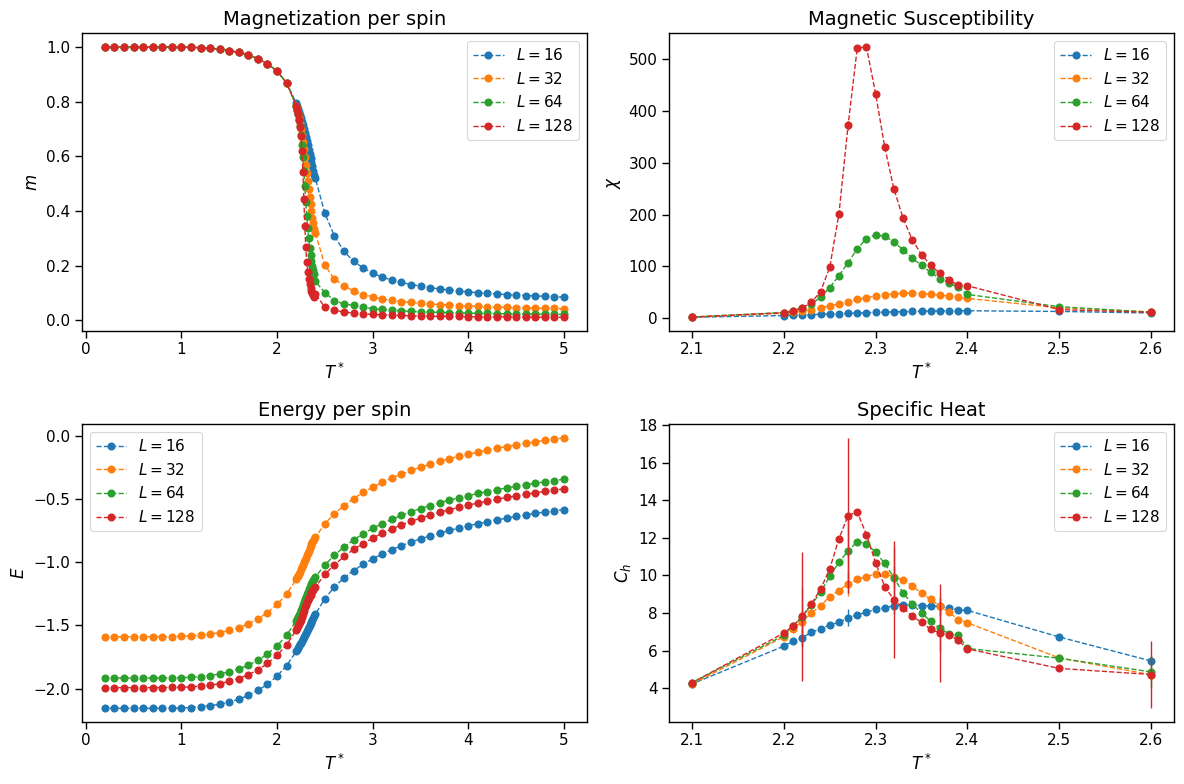

In [2]:
sizes = [16, 32,64,128]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [np.loadtxt("test_alt" + str(k) + ".txt") for k in sizes]


plt.figure(figsize=(12,8))


plt.subplot(221)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,2], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[:,0], data[:,2], yerr=data[:,3], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$m$")
plt.title("Magnetization per spin")

plt.subplot(222)

a = 24
b = 48
step = 5

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,4]* zoom[k], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[a:b:step,0], data[a:b:step,4]* zoom[k], yerr=data[a:b:step,5]* zoom[k], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$\chi$")
plt.title("Magnetic Susceptibility")

plt.subplot(223)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,6], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[:,0], data[:,6], yerr=data[:,7], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper left")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$E$")
plt.title("Energy per spin")


plt.subplot(224)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,8] * zoom[k], ls="--", marker="o", label = labels[k], color = c)
    plt.errorbar(data[a:b:step,0], data[a:b:step,8] * zoom[k], yerr=data[a:b:step,9]*zoom[k], fmt="none", ecolor = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T^*$")
plt.ylabel(r"$C_h$")
plt.title("Specific Heat")

plt.tight_layout()
plt.savefig("Observ.eps")
plt.show()




In [28]:
data[:,3]

array([1.28549e-04, 1.34392e-04, 1.38639e-04, 1.45054e-04, 1.49730e-04,
       1.54658e-04, 1.62160e-04, 1.68688e-04, 1.80013e-04, 1.84530e-04,
       2.02069e-04, 2.14287e-04, 2.30005e-04, 2.58653e-04, 2.73399e-04,
       2.99199e-04, 3.33779e-04, 3.95773e-04, 4.26431e-04, 5.24304e-04,
       6.09863e-04, 7.91474e-04, 9.96525e-04, 1.30683e-03, 1.91905e-03,
       3.80136e-03, 8.28357e-03, 4.09805e-04, 4.32186e-04, 4.63225e-04,
       5.03917e-04, 5.43904e-04, 5.78286e-04, 6.25966e-04, 6.63082e-04,
       6.91966e-04, 6.99956e-04, 6.81157e-04, 6.31310e-04, 5.52820e-04,
       4.77715e-04, 3.95239e-04, 3.22048e-04, 2.64127e-04, 2.23172e-04,
       1.88655e-04, 1.64582e-04, 5.98802e-04, 2.07873e-04, 1.00133e-04,
       5.37688e-05, 3.17778e-05, 1.74968e-05, 8.60594e-06, 1.94400e-06,
       3.53374e-06, 3.39283e-06, 2.67653e-06, 1.89253e-06, 1.19659e-06,
       6.96315e-07, 3.20033e-07, 1.18343e-07, 2.48942e-08, 0.00000e+00,
       0.00000e+00, 0.00000e+00])

-0.12049445887955168 0.0008832449203940776
1.7338924596479772 0.0017389228710570932
0.2435957023772062 0.014104731483484963


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


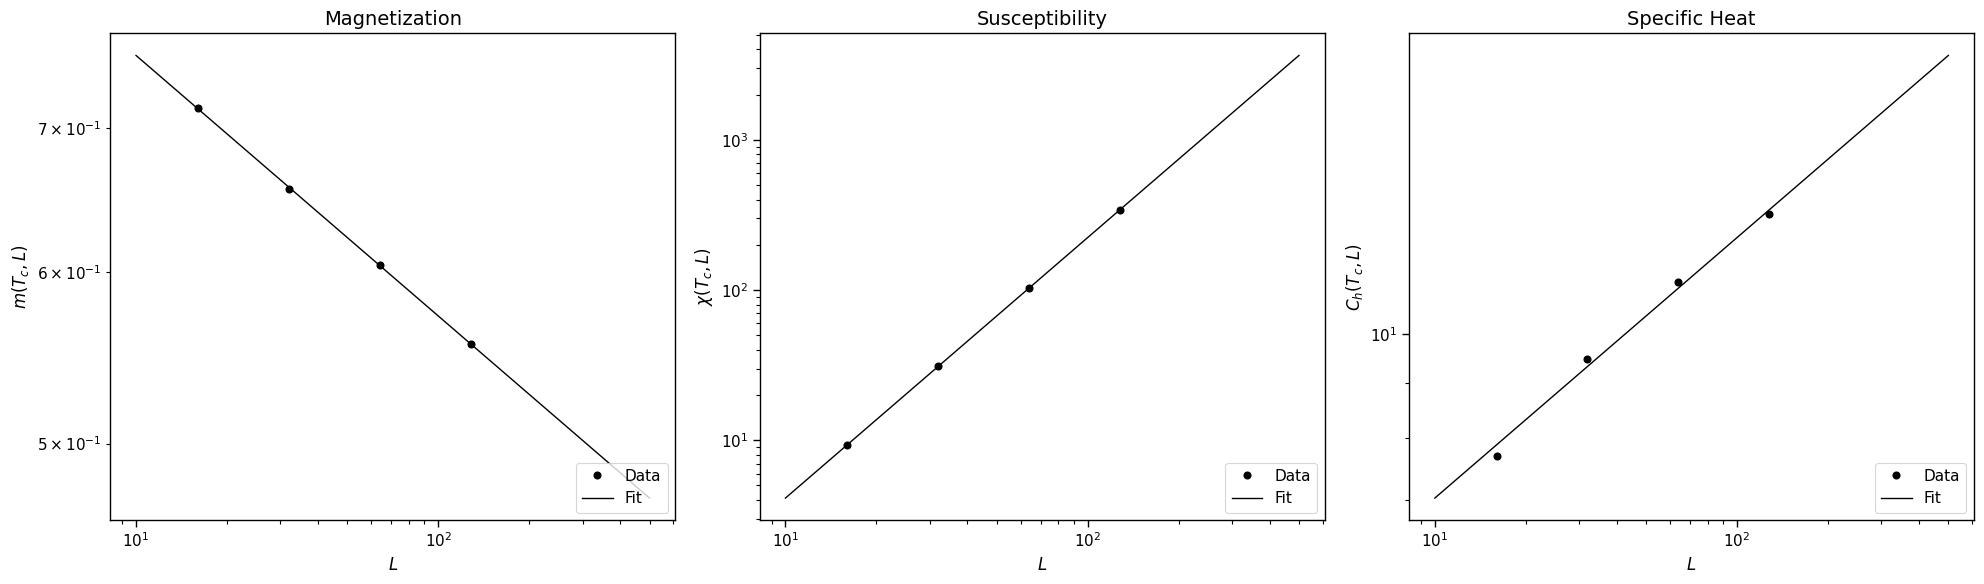

In [7]:
#Get the data
sizes = [16, 32, 64, 128]
zoom = np.power(sizes, 2.0)
dataset = [np.loadtxt("test_alt" + str(k) + ".txt") for k in sizes]

alfa = 0.0
t = np.linspace(10,500,100)
var = np.power(t, 7.0/4.0)


#To store some linear interpolations between data
m = np.empty(len(sizes))
n = np.empty(len(sizes))
cortes = np.empty((len(sizes),3))

#Points 2.6 and 2.7 in x 
a = 40
b = 39

tc = 2.2682932444826074 #Critical T

#Magnetization
x = 0
y = 2

#Create interpolation lines
k = 0
for data in dataset:
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x]) #Get slope,
    n[k] = data[a, y] - m[k] * data[a, x]    #Independent term
    cortes[k,0] = m[k] * tc + n[k] #At critical t
    k += 1


    
#Chi
x = 0
y = 4
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k] #Make the appropiate scale - not per spin
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,1] = m[k] * tc + n[k]
    k += 1
    
#Specific heat
x = 0
y = 8
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k]
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,2] = m[k] * tc + n[k]
    k += 1

titles = ["Magnetization", "Susceptibility", "Specific Heat"]
ylabels =[r"$m(T_c, L)$", r"$\chi(T_c, L)$", r"$C_h (T_c, L)$"]

plt.figure(figsize=(20,6))
for k in range(3):
    plt.subplot(1,3,k+1) #Create a subplot
    #MAke the fit
    popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), sizes, np.abs(cortes[:,k]))
    perr = np.sqrt(np.diag(pcov)) #And compute its errors
    print(popt[0], perr[0]) #Show the values
    #Plot the data and also the fit
    plt.plot(sizes, np.abs(cortes[:,k]), ls="none", marker = "o", label="Data", color="black")
    plt.plot(t, np.power(t, popt[0])*popt[1],  label="Fit", color="black")
    #Legend, title and so on
    plt.legend(loc="lower right")
    plt.title(titles[k])
    plt.xlabel(r"$L$")
    plt.ylabel(ylabels[k])
    plt.yscale('log')
    plt.xscale('log')
plt.tight_layout()
plt.savefig("criticexp.eps")
plt.show()